In [2]:
import pdfplumber
import os
import glob
import pandas as pd
import numpy as np
import re

# Test pdfplumber

In [2]:
pdf = pdfplumber.open('./Sample_data/甲乙丙.pdf')
page = pdf.pages[0]
text = page.extract_text()
text

'姓 名: 病 区: 病 历 号:M0XXXX7X 样本编号:1447\n性 别:女 科 室: 临床诊断:重症肌无 条形码号:223XX03XXX\n年 龄:73岁 床 号: 力送检医生:XX 标本种类:全血\n备 注: 检验目的:血常规 收费类别:门诊医保\n检验项目 结果 参考区间 检验项目 结果 参考区间\n白细胞计数(WBC) 7.17 3.5-9.5x10^9/L 中性粒细胞绝对值(NEUT#) 4.87 1.8-6.3x10^9/L\n红细胞计数(RBC) 4.43 3.8-5.1x10^12/L 淋巴细胞绝对值(LYMPH#) 1.72 1.1-3.2x10^9/L\n血红蛋白(HGB) 134 115-150g/L 单核细胞绝对值(MONO#) 0.48 0.1-0.6x10^9/L\n红细胞压积(HCT) 40.3 35-45% 嗜酸性粒细胞绝对值(EO#) 0.05 0.02-0.52x10^9/L\n平均红细胞血红蛋白量(MCH) 30.2 27.0-34.0pg 嗜碱性粒细胞绝对值(BASO#) 0.05 0-0.06x10^9/L\n平均红细胞体积(MCV) 91.0 82.0-100.0fl 血小板计数(PLT) 166 125-350x10^9/L\n平均红细胞血红蛋白浓度(MCHC) 333 316-354g/L 中性淋巴比值(NLR) 2.8 0.9-3.1\n红细胞分布宽度(RDW-SD) 41.6 39.0-52.3fl 血小板淋巴比值(PLR) 96.5 69.5-182.6\n红细胞分布宽度--变异系数(RDW-CV) 12.6 10.0-15.0%\n血小板分布宽度(PDW) 13.8 9.0-18.1fl\n平均血小板体积(MPV) 10.7 9.40-13.50fl\n大血小板比率(P-LCR) 30.4 19.1-47.0%\n中性粒细胞%(NEUT%) 67.9 40.0-75.0%\n淋巴细胞%(LYMPH%) 24.0 20.0-50.0%\n单核细胞%(MONO%) 6.7 3.0-10.0%\n嗜酸性粒细胞%(EO%) 0.7 0.4-8.0%\n嗜碱性粒细胞%(BASO%) 0.7 0.0-1.0%\n采样时间:2023-07-20 10:45:54 接收时间:2023-07-20 10:52:54 报告

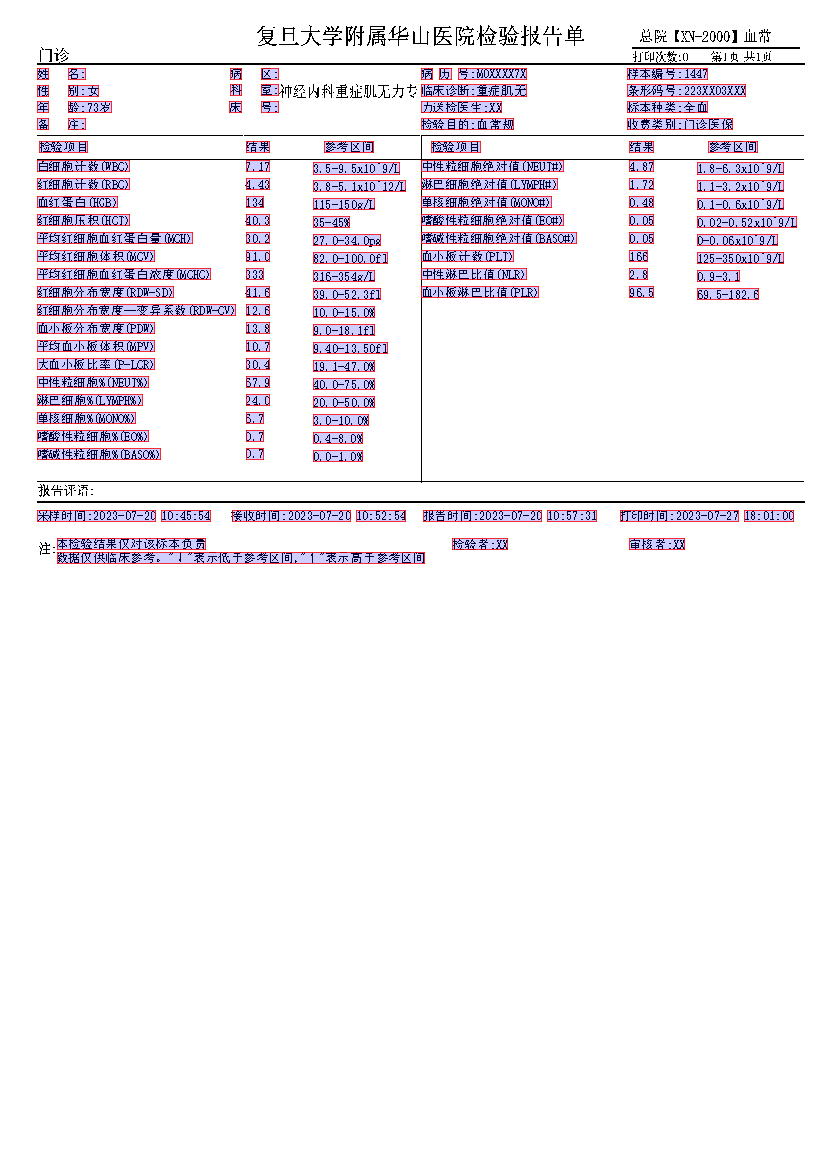

In [3]:
im = pdf.pages[0].to_image(resolution=100)
im.draw_rects(page.extract_words())

# Data extraction

In [3]:
root_dir = os.getcwd() 
# 检验报告文件夹路径
base_path = os.path.join(root_dir, 'Sample_data') 
print(base_path)
PDF_files = glob.glob(os.path.join(base_path, '*.pdf'))
PDF_files

c:\Users\cpres\Documents\GitHub\Hemogram_report_extraction\Sample_data


['c:\\Users\\cpres\\Documents\\GitHub\\Hemogram_report_extraction\\Sample_data\\佚名A.pdf',
 'c:\\Users\\cpres\\Documents\\GitHub\\Hemogram_report_extraction\\Sample_data\\匿名B.pdf',
 'c:\\Users\\cpres\\Documents\\GitHub\\Hemogram_report_extraction\\Sample_data\\甲乙丙.pdf']

In [4]:
PDF_dicts = []

for PDF_file in PDF_files:
    Name = re.search(r'[^\\]+(?=\.pdf)', PDF_file).group() 
    
    # 提取PDF信息
    pdf = pdfplumber.open(PDF_file)
    page = pdf.pages[0]
    text = page.extract_text()

    Collection_date = re.findall(r'采样时间:(\d+-\d+-\d+)', text)[0]
    
    WBC = re.findall(r'白细胞计数\(WBC\) (\d+\.\d+)', text)[0]
    RBC = re.findall(r'红细胞计数\(RBC\) (\d+\.\d+)', text)[0]
    HGB = re.findall(r'血红蛋白\(HGB\) (\d+)', text)[0]
    HCT = re.findall(r'红细胞压积\(HCT\) (\d+\.\d+)', text)[0]
    MCH = re.findall(r'平均红细胞血红蛋白量\(MCH\) (\d+\.\d+)', text)[0]
    MCV = re.findall(r'平均红细胞体积\(MCV\) (\d+\.\d+)', text)[0]
    MCHC = re.findall(r'平均红细胞血红蛋白浓度\(MCHC\) (\d+)', text)[0]
    RDW_SD = re.findall(r'红细胞分布宽度\(RDW-SD\) (\d+\.\d+)', text)[0]
    RDW_CV = re.findall(r'红细胞分布宽度--变异系数\(RDW-CV\) (\d+\.\d+)', text)[0]
    PDW = re.findall(r'血小板分布宽度\(PDW\) (\d+\.\d+)', text)[0]
    MPV = re.findall(r'平均血小板体积\(MPV\) (\d+\.\d+)', text)[0]
    P_LCR = re.findall(r'大血小板比率\(P-LCR\) (\d+\.\d+)', text)[0]
    NEUT_percent = re.findall(r'中性粒细胞%\(NEUT%\) (\d+\.\d+)', text)[0]
    LYMPH_percent = re.findall(r'淋巴细胞%\(LYMPH%\) (\d+\.\d+)', text)[0]
    MONO_percent = re.findall(r'单核细胞%\(MONO%\) (\d+\.\d+)', text)[0]
    EO_percent = re.findall(r'嗜酸性粒细胞%\(EO%\) (\d+\.\d+)', text)[0]
    BASO_percent = re.findall(r'嗜碱性粒细胞%\(BASO%\) (\d+\.\d+)', text)[0]
    NEUT_absolute = re.findall(r'中性粒细胞绝对值\(NEUT#\) (\d+\.\d+)', text)[0]
    LYMPH_absolute = re.findall(r'淋巴细胞绝对值\(LYMPH#\) (\d+\.\d+)', text)[0]
    MONO_absolute = re.findall(r'单核细胞绝对值\(MONO#\) (\d+\.\d+)', text)[0]
    EO_absolute = re.findall(r'嗜酸性粒细胞绝对值\(EO#\) (\d+\.\d+)', text)[0]
    BASO_absolute = re.findall(r'嗜碱性粒细胞绝对值\(BASO#\) (\d+\.\d+)', text)[0]
    PLT = re.findall(r'血小板计数\(PLT\) (\d+)', text)[0]
    NLR = re.findall(r'中性淋巴比值\(NLR\) (\d+\.\d+)', text)[0]
    PLR = re.findall(r'血小板淋巴比值\(PLR\) (\d+\.\d+)', text)[0]
    
    
    PDF_dicts.append({'Name': Name, 'Collection_date': Collection_date, 'File': PDF_file, 'WBC': WBC, 'RBC': RBC, 'HGB': HGB, 'HCT': HCT, 'MCH': MCH, 'MCV': MCV, 'MCHC': MCHC, 'RDW_SD': RDW_SD, 'RDW_CV': RDW_CV, 'PDW': PDW, 'MPV': MPV, 'P_LCR': P_LCR, 'NEUT%': NEUT_percent, 'LYMPH%': LYMPH_percent, 'MONO%': MONO_percent, 'EO%': EO_percent, 'BASO%': BASO_percent, 'NEUT#': NEUT_absolute, 'LYMPH#': LYMPH_absolute, 'MONO#': MONO_absolute, 'EO#': EO_absolute, 'BASO#': BASO_absolute, 'PLT': PLT, 'NLR': NLR, 'PLR': PLR})

PDF_dicts

[{'Name': '佚名A',
  'Collection_date': '2023-09-14',
  'File': 'c:\\Users\\cpres\\Documents\\GitHub\\Hemogram_report_extraction\\Sample_data\\佚名A.pdf',
  'WBC': '6.03',
  'RBC': '4.92',
  'HGB': '114',
  'HCT': '36.9',
  'MCH': '23.2',
  'MCV': '75.0',
  'MCHC': '309',
  'RDW_SD': '41.2',
  'RDW_CV': '15.1',
  'PDW': '10.2',
  'MPV': '9.4',
  'P_LCR': '20.8',
  'NEUT%': '67.7',
  'LYMPH%': '23.4',
  'MONO%': '7.1',
  'EO%': '1.5',
  'BASO%': '0.3',
  'NEUT#': '4.08',
  'LYMPH#': '1.41',
  'MONO#': '0.43',
  'EO#': '0.09',
  'BASO#': '0.02',
  'PLT': '257',
  'NLR': '2.9',
  'PLR': '182.3'},
 {'Name': '匿名B',
  'Collection_date': '2023-07-13',
  'File': 'c:\\Users\\cpres\\Documents\\GitHub\\Hemogram_report_extraction\\Sample_data\\匿名B.pdf',
  'WBC': '4.10',
  'RBC': '3.96',
  'HGB': '121',
  'HCT': '35.9',
  'MCH': '30.6',
  'MCV': '90.7',
  'MCHC': '337',
  'RDW_SD': '41.8',
  'RDW_CV': '12.6',
  'PDW': '11.0',
  'MPV': '9.7',
  'P_LCR': '21.9',
  'NEUT%': '51.1',
  'LYMPH%': '39.8',
  '

In [6]:
Results = pd.DataFrame(PDF_dicts)#.to_excel('Sample_results.xlsx', encoding='utf_8_sig', index=False)
Results

,Name,Collection_date,File,WBC,RBC,HGB,HCT,MCH,MCV,MCHC,...,EO%,BASO%,NEUT#,LYMPH#,MONO#,EO#,BASO#,PLT,NLR,PLR
0,佚名A,2023-09-14,c:\Users\cpres\Documents\GitHub\Hemogram_repor...,6.03,4.92,114,36.9,23.2,75.0,309,...,1.5,0.3,4.08,1.41,0.43,0.09,0.02,257,2.9,182.3
1,匿名B,2023-07-13,c:\Users\cpres\Documents\GitHub\Hemogram_repor...,4.10,3.96,121,35.9,30.6,90.7,337,...,1.5,0.5,2.10,1.63,0.29,0.06,0.02,185,1.3,113.5
2,甲乙丙,2023-07-20,c:\Users\cpres\Documents\GitHub\Hemogram_repor...,7.17,4.43,134,40.3,30.2,91.0,333,...,0.7,0.7,4.87,1.72,0.48,0.05,0.05,166,2.8,96.5
